In [39]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
print(tf.__version__)

2.3.1


In [19]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [25]:
plt.style.use('fivethirtyeight')

In [40]:
sns.set_context('notebook')

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_lables), (test_images, tets_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 13s 3us/step


In [50]:
test_labels = tets_labels

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## EDA

In [5]:
train_images.shape

(60000, 28, 28)

In [57]:
train_lables.shape

(60000,)

In [6]:
train_lables[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

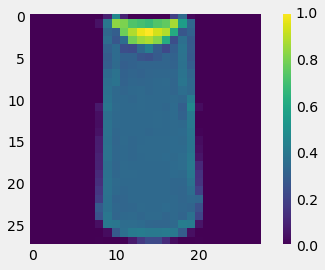

In [27]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# scale 255 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

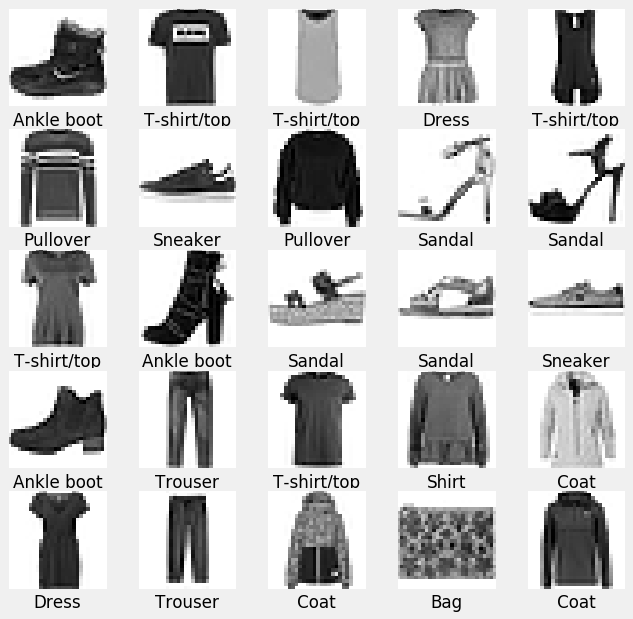

In [28]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_lables[i]])
plt.show()

## model training

In [12]:
# model structure
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
# model compiling
model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [44]:
history = model.fit(train_images, train_lables, validation_split=0.2, epochs=30, batch_size=100, verbose=1)

Epoch 1/30
480/480 [==============================] - 1s 1ms/step - loss: 0.0194 - accuracy: 0.9938 - val_loss: 0.4449 - val_accuracy: 0.9190
Epoch 2/30
480/480 [==============================] - 1s 1ms/step - loss: 0.0191 - accuracy: 0.9944 - val_loss: 0.4526 - val_accuracy: 0.9193
Epoch 3/30
480/480 [==============================] - 1s 1ms/step - loss: 0.0195 - accuracy: 0.9935 - val_loss: 0.4597 - val_accuracy: 0.9179
Epoch 4/30
480/480 [==============================] - 1s 1ms/step - loss: 0.0196 - accuracy: 0.9937 - val_loss: 0.4609 - val_accuracy: 0.9188
Epoch 5/30
480/480 [==============================] - 1s 1ms/step - loss: 0.0199 - accuracy: 0.9936 - val_loss: 0.4629 - val_accuracy: 0.9171
Epoch 6/30
480/480 [==============================] - 1s 1ms/step - loss: 0.0210 - accuracy: 0.9929 - val_loss: 0.4748 - val_accuracy: 0.9152
Epoch 7/30
480/480 [==============================] - 1s 1ms/step - loss: 0.0202 - accuracy: 0.9932 - val_loss: 0.4761 - val_accuracy: 0.9165
Epoch 

In [37]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### show training loss and validation loss

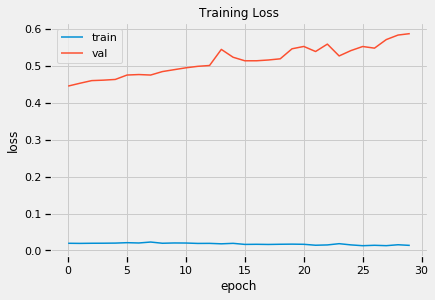

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc='best')
plt.show()

In [46]:
model.fit(train_images, train_lables, epochs=3, batch_size=100, verbose=0)

In [51]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 0.9534 - accuracy: 0.8818


In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### model prediction

In [52]:
prob_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [53]:
prediction = prob_model.predict(test_images[:5])

In [54]:
prediction

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.91152867e-18, 0.00000000e+00, 6.65399437e-16,
        0.00000000e+00, 1.00000000e+00],
       [9.65012672e-16, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.47937163e-10, 7.36563408e-32, 8.06836423e-13, 0.00000000e+00,
        4.75323847e-23, 0.00000000e+00],
       [1.27950621e-32, 1.00000000e+00, 0.00000000e+00, 4.60157530e-28,
        0.00000000e+00, 0.00000000e+00, 9.40497074e-36, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.11371136e-27, 1.00000000e+00, 1.24708669e-37, 1.14089673e-27,
        5.74016005e-28, 2.80792213e-36, 7.07759071e-27, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [9.88837600e-01, 2.63960181e-38, 1.01210975e-11, 3.76515813e-19,
        1.52594317e-30, 2.76506627e-30, 1.11624151e-02, 7.46971097e-26,
        3.42797831e-20, 0.00000000e+00]], dtype=float32)

In [56]:
np.argmax(prediction,axis=1)

array([9, 2, 1, 1, 0])